# Maximum Entropy of Australians

In this notebook we plot the entropy of the "Australians" problem.

Written by DP, June 2019. 

## Import functions

In [1]:
%matplotlib inline

In [4]:
import numpy as np

import scipy.stats as stats
from scipy.stats import norm, uniform

from scipy.optimize import minimize
from scipy.optimize import Bounds
from scipy.optimize import LinearConstraint

import scipy.integrate as integrate

import matplotlib.pyplot as plt

import ipywidgets as widgets
from ipywidgets import HBox, VBox, Layout, Tab, Label, Checkbox, Button
from ipywidgets import FloatSlider, IntSlider, Play, Dropdown, HTMLMath 

from IPython.display import display

import seaborn as sns
sns.set()
sns.set_context("talk")

## Define the constrained entropy

In [41]:
def Entropy(x):
    """
    Defines the Entropy for a given probability
    Regularizes if if x=0
    """
#    if x==0:
#        S=0
#    else:
    S=-x*np.log(np.abs(x))
    return S

In [39]:
def ConstrainedEntropy(x):
    """
    Defines the Entropy for this discrete set of probabilities p[i]
    """
    return Entropy(x)+Entropy(0.25-x)+Entropy(0.33-x)+Entropy(5/12+x)

## Maximize the constrained entropy

Maximum entropy is 1.198 at x=0.083


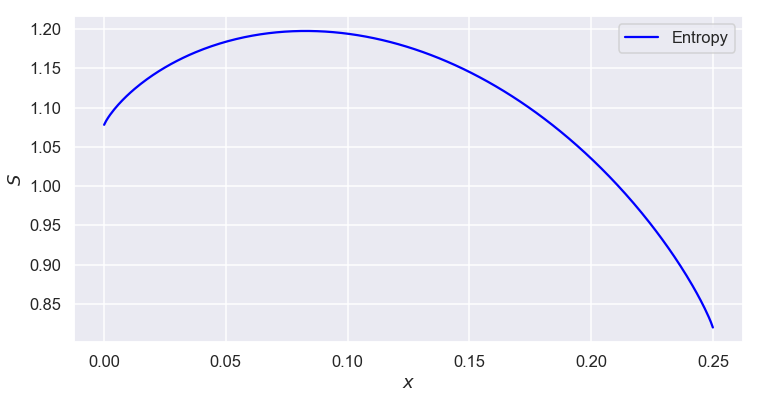

In [64]:
x_pts = np.linspace(0.0001, 0.2499, 301)   # mesh for plots (enough so smooth)
S = ConstrainedEntropy(x_pts)
font_size = 18
plt.rcParams.update({'font.size': font_size})
    
fig = plt.figure(figsize=(12,6))

ax = fig.add_subplot(1,1,1)
ax.plot(x_pts, S, label="Entropy", color="blue")
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$S$')
ax.legend()

print(f'Maximum entropy is {np.amax(S):.3f} at x={x_pts[np.where(S==np.amax(S))][0]:.3f}')